In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [43]:
df = pd.read_csv("Unemployment in India.csv")
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [44]:
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10,6)

In [45]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [46]:
df.columns = [col.strip().replace(" ", "_") for col in df.columns]
print(df.columns)

Index(['Region', 'Date', 'Frequency', 'Estimated_Unemployment_Rate_(%)',
       'Estimated_Employed', 'Estimated_Labour_Participation_Rate_(%)',
       'Area'],
      dtype='object')


In [47]:
df["Date"] = pd.to_datetime(df["Date"])

C:\Users\Ahmed Salama\AppData\Local\Temp\ipykernel_8892\936118274.py:1: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df["Date"] = pd.to_datetime(df["Date"])


In [48]:
df["Year"] = df["Date"].dt.year

In [49]:
df["Month_Name"] = df["Date"].dt.strftime('%b')

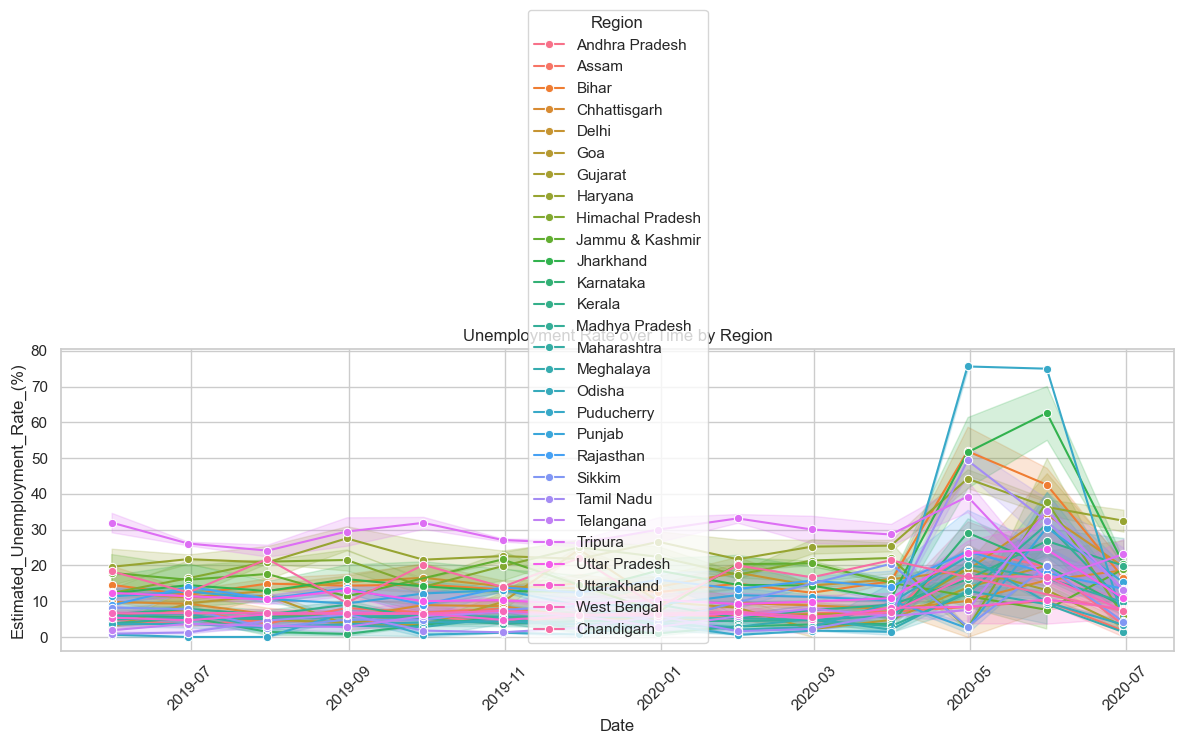

In [50]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x="Date", y="Estimated_Unemployment_Rate_(%)", hue="Region", marker="o")
plt.title("Unemployment Rate over Time by Region")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [51]:
region_avg = df.groupby("Region")["Estimated_Unemployment_Rate_(%)"].mean().sort_values(ascending=False)

C:\Users\Ahmed Salama\AppData\Local\Temp\ipykernel_8892\328850714.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_avg.values, y=region_avg.index, palette="viridis")


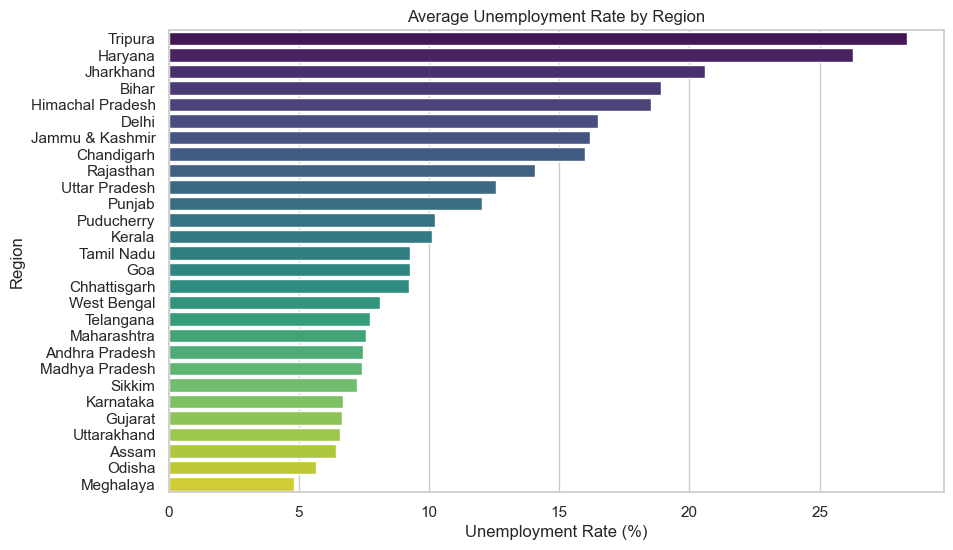

In [52]:
plt.figure(figsize=(10,6))
sns.barplot(x=region_avg.values, y=region_avg.index, palette="viridis")
plt.title("Average Unemployment Rate by Region")
plt.xlabel("Unemployment Rate (%)")
plt.ylabel("Region")
plt.show()

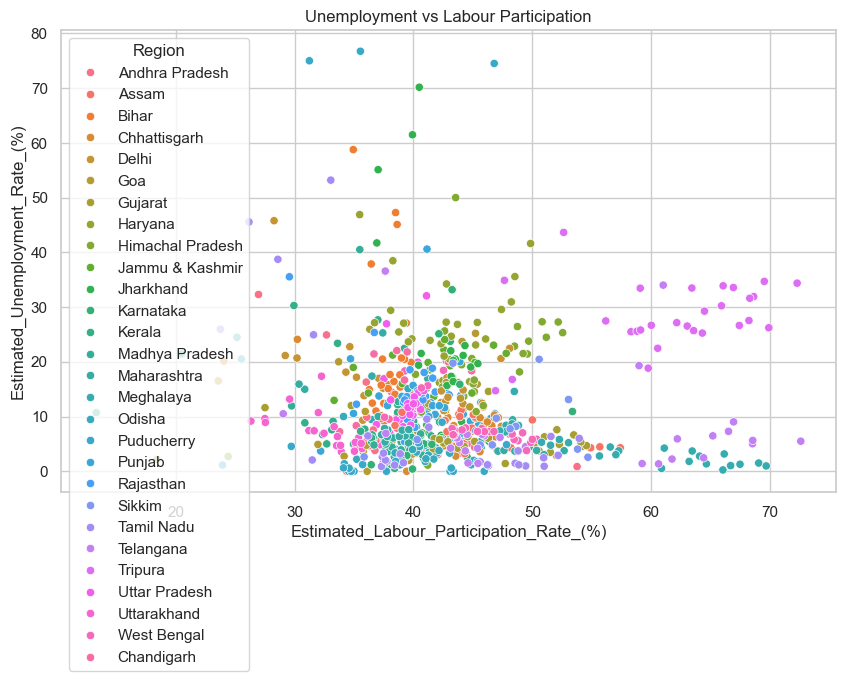

In [53]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="Estimated_Labour_Participation_Rate_(%)", y="Estimated_Unemployment_Rate_(%)", hue="Region")
plt.title("Unemployment vs Labour Participation")
plt.show()

In [54]:
pivot = df.pivot_table(values="Estimated_Unemployment_Rate_(%)", index="Region", columns="Month_Name")

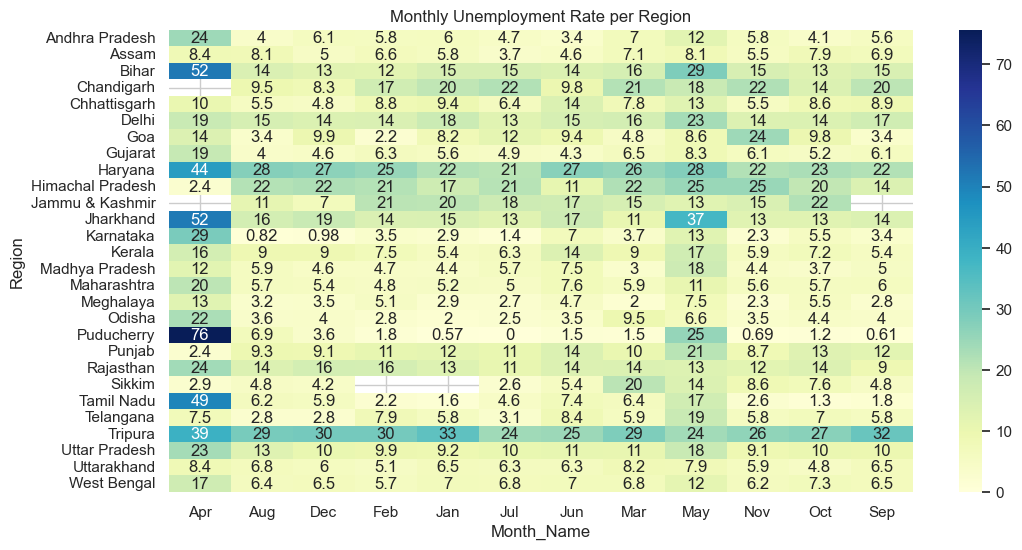

In [57]:
plt.figure(figsize=(12,6))
sns.heatmap(pivot, annot=True, cmap="YlGnBu")
plt.title("Monthly Unemployment Rate per Region")
plt.show()